In [22]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
sys.path.append('/Users/kate_fieseler/PycharmProjects/chemUtils')
import pandas as pd
import chemUtils
from chemUtils import protein

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


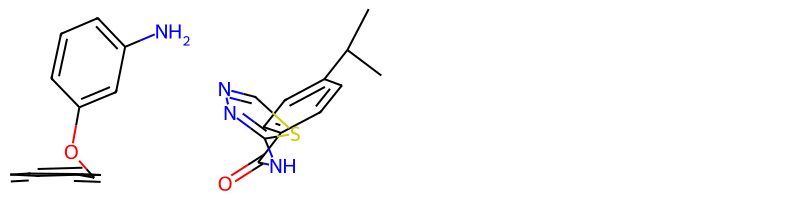

In [23]:
# Convert sdf of first base compound to mol
fragments = Chem.SDMolSupplier('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/fragalysis/NCS1_combined.sdf')
# for mol in follow_ups:
#     #img = Draw.MolsToImage(mol)
Draw.MolsToGridImage(fragments, molsPerRow=4)

In [24]:
def run_fragmenstein(hits,  # list of rdkit mol objects of hits to help place
                     apo_file,  # path to pdb file for protein
                     work_path,
                     smiles,
                     name):
    Igor.init_pyrosetta()
    v = Victor(hits=hits, pdb_filename=apo_file)
    v.work_path = work_path
    v.place(smiles, long_name=name)

In [25]:
# load dataframe of elaborated compounds
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/Amidation_O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1/Amidation_50_analogs.csv')
df

,reactant1_structuralScore,reactant1_mw,reactant1_smi,reactant1_metadata,reactant2_structuralScore,reactant2_mw,reactant2_smi,reactant2_metadata,product_smi,is_pains
0,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.000000,255.013619,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,NaN,O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(...,False
1,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.122741,361.448000,O=S(=O)(Nc1nccs1)c1ccc(NCc2ccccc2O)cc1,"[{'catalogName': 'molport', 'catalogId': 'MolP...",O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)N(Cc1ccccc1O)...,True
2,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.134966,349.397000,O=C(Nc1ccc(S(=O)(=O)Nc2nccs2)cc1)c1cn[nH]c1,"[{'catalogName': 'mcule_ultimate', 'catalogId'...",O=C(Nc1ccc(S(=O)(=O)Nc2nccs2)cc1)c1cnn(C(=O)Cc...,False
3,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.138392,259.348407,[2H]c1c([2H])c(S(=O)(=O)Nc2nccs2)c([2H])c([2H]...,"[{'catalogName': 'enamine_bb', 'catalogId': 'E...",[2H]c1c([2H])c(S(=O)(=O)Nc2nccs2)c([2H])c([2H]...,False
4,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.148876,309.416000,Cc1cnc(NS(=O)(=O)c2ccc3c(c2)CCCN3)s1,"[{'catalogName': 'enamine_made', 'catalogId': ...",Cc1cnc(NS(=O)(=O)c2ccc3c(c2)CCCN3C(=O)Cc2cn(Cc...,False
5,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.156467,309.416000,Cc1csc(NS(=O)(=O)c2ccc3c(c2)CCCN3)n1,"[{'catalogName': 'enamine_made', 'catalogId': ...",Cc1csc(NS(=O)(=O)c2ccc3c(c2)CCCN3C(=O)Cc2cn(Cc...,False
6,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.158918,364.412000,Cc1nnc(Nc2ccc(S(=O)(=O)Nc3nccs3)cc2)[nH]c1=O,"[{'catalogName': 'molport', 'catalogId': 'MolP...",Cc1nnc(N(C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)c2c...,False
7,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.158918,364.412000,Cc1nnc(Nc2ccc(S(=O)(=O)Nc3nccs3)cc2)[nH]c1=O,"[{'catalogName': 'molport', 'catalogId': 'MolP...",Cc1nnc(Nc2ccc(S(=O)(=O)Nc3nccs3)cc2)n(C(=O)Cc2...,False
8,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.159766,354.457000,CCC(C)(N)C(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,"[{'catalogName': 'mcule', 'catalogId': 'MCULE-...",CCC(C)(NC(=O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12)C(=O...,False
9,0.0,283.100857,O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12,NaN,0.186391,313.360000,Nc1ccc(S(=O)(=O)Nc2nc(CC(=O)O)cs2)cc1,"[{'catalogName': 'emolecules', 'catalogId': '4...",O=C(O)Cc1csc(NS(=O)(=O)c2ccc(NC(=O)Cc3cn(Cc4cc...,False


In [26]:
smiles = df['product_smi'].tolist()
smiles # original base compound is first

['O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1',
 'O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)N(Cc1ccccc1O)c1ccc(S(=O)(=O)Nc2nccs2)cc1',
 'O=C(Nc1ccc(S(=O)(=O)Nc2nccs2)cc1)c1cnn(C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)c1',
 '[2H]c1c([2H])c(S(=O)(=O)Nc2nccs2)c([2H])c([2H])c1NC(=O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12',
 'Cc1cnc(NS(=O)(=O)c2ccc3c(c2)CCCN3C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)s1',
 'Cc1csc(NS(=O)(=O)c2ccc3c(c2)CCCN3C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)n1',
 'Cc1nnc(N(C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)c2ccc(S(=O)(=O)Nc3nccs3)cc2)[nH]c1=O',
 'Cc1nnc(Nc2ccc(S(=O)(=O)Nc3nccs3)cc2)n(C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)c1=O',
 'CCC(C)(NC(=O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12)C(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1',
 'O=C(O)Cc1csc(NS(=O)(=O)c2ccc(NC(=O)Cc3cn(Cc4ccc(F)cc4)c4ccccc34)cc2)n1',
 'Cc1cnc(NS(=O)(=O)c2ccc(NC(=O)Cc3cn(Cc4ccc(F)cc4)c4ccccc34)cc2)s1',
 'Cc1cc(N(C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)c2ccc(S(=O)(=O)Nc3nccs3)cc2)ncn1',
 'Cc1cnc(NS(=O)(=O)c2ccc3c(c2)CCN3C(=O)Cc2cn(Cc3ccc(F)cc3)c3ccccc23)s1',

In [27]:
hits = Chem.SDMolSupplier('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/Amidation_O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1/placed/base/base_minimised.sdf')
apo_file = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/fragmenstein_info/template-x0715.pdb'
work_path = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/Amidation_O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1/placed/'


In [14]:
# TEST IDEA 1
smiles = 'CC1CC(C)CN(CCN(C)C(=O)C=C2CC3CNC2C3)C1'
apo_file = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/d68_fragment_apofiles/D68EV3CPROA-x0771_0A_apo-desolv.pdb'

In [15]:
# TEST IDEA 1
run_fragmenstein([base_mol],
                 apo_file,
                 'Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/',
                 smiles,
                 'elaborated_compound1')

elaborated-compound1 - Folder /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/elaborated-compound1 exists.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [28]:
# RUN FRAGMENSTEIN WITH FRAGMENTS AS HITS
apo_file = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/fragmenstein_info/template-x0715.pdb'
work_path = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/Amidation_O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1/placed_50/'

for i in range(len(smiles)):
    if i == 0: # skip base compound
        continue
    else:
        run_fragmenstein(fragments,
                         apo_file,
                         work_path,
                         smiles[i],
                         'D2R-5_elaborated_frag_'+str(i))
        

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

D2R-5-elaborated-frag-8 - failed to minimise without constraints:  22.575643733252363 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

In [29]:
# RUN FRAGMENSTEIN WITH BASE AS HITS
base = Chem.SDMolSupplier('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/Amidation_O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1/placed/base/base_minimised.sdf')
for i in range(len(smiles)):
    if i == 0: # skip base compound
        continue
    else:
        run_fragmenstein(base,
                         apo_file,
                         work_path,
                         smiles[i],
                         'D2R-5_elaborated_base_'+str(i))

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

D2R-5-elaborated-base-7 - failed to minimise without constraints:  60.58145002659587 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

D2R-5-elaborated-base-17 - failed to minimise without constraints:  24.290815302343645 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


D2R-5-elaborated-base-20 - failed to minimise without constraints:  18.53068774162243 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


D2R-5-elaborated-base-23 - failed to minimise without constraints:  10.878462313793033 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


D2R-5-elaborated-base-26 - failed to minimise without constraints:  45.536434482277016 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

D2R-5-elaborated-base-43 - failed to minimise without constraints:  149.87331126475186 kcal/mol.


PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serializa

Test Idea 1 worked well. Now to try Idea 2.

In [59]:
# EXTRACTING LIGAND TRY
def extract_ligand(pdb_file_path):
    # Read the PDB file
    complex_mol = Chem.MolFromPDBFile(pdb_file_path, sanitize=False)

    # Identify the small molecule
    # This could be done in various ways depending on the structure of the PDB file
    # Here's an example that assumes the small molecule's atoms are all in a specific residue
    small_molecule_atoms = [atom for atom in complex_mol.GetAtoms() if atom.GetPDBResidueInfo().GetResidueName() == 'LIG']

    # Extract the small molecule
    edit_mol = Chem.EditableMol(Chem.Mol())
    atom_map = {}
    for atom in small_molecule_atoms:
        idx = edit_mol.AddAtom(atom)
        atom_map[atom.GetIdx()] = idx

    for atom in small_molecule_atoms:
        for neighbor in atom.GetNeighbors():
            if neighbor in small_molecule_atoms:
                edit_mol.AddBond(atom_map[atom.GetIdx()], atom_map[neighbor.GetIdx()], neighbor.GetBondType())

    small_molecule_mol = edit_mol.GetMol()
    return small_molecule_mol

In [3]:
# EXTRACTING LIGAND TRY WITH PAT WALTERS CODE
%autoreload 2
from chemUtils.protein import split_complex_v2


In [5]:
hitA_pdb_file_path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x0771_0A/D68EV3CPROA-x0771_0A_bound_pocket.pdb'
hitB_pdb_file_path = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound.pdb'
extract_ligand(hitA_pdb_file_path)
split_complex_v2.main(hitB_pdb_file_path)

@> 3197 atoms and 1 coordinate set(s) were parsed in 0.01s.


wrote /Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound.pdb_protein.pdb


KeyError: 'ligandInfo'

In [13]:
hitA = Chem.MolFromMol2File('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x0771_0A/D68EV3CPROA-x0771_0A_bound_pocket_no_protein.mol2')
hitB = Chem.MolFromMol2File('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/aligned/D68EV3CPROA-x1083_0A/D68EV3CPROA-x1083_0A_bound_no_protein.mol2')
hitA

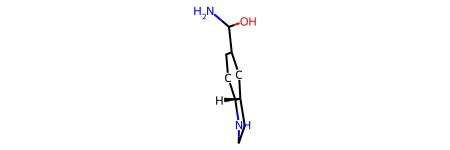

In [7]:
# JUST LOAD STRAIGHT FRAGMENTS FROM SDF
fragments = Chem.SDMolSupplier('/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/D68EV3CPROA_fragalysis_allhits/D68EV3CPROA_combined.sdf')
Draw.MolsToGridImage(fragments, molsPerRow=4)
# x0771_0A is the 3rd
# x1083_0A is the 8th
hitA = fragments[2]
hitB = fragments[7]
hitA

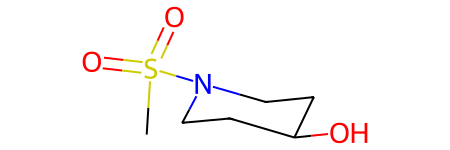

In [8]:
hitB

In [10]:
smiles = 'CC1CC(C)CN(CCN(C)C(=O)C=C2CC3CNC2C3)C1'
apo_file = '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/D68EV3CPROA/d68_fragment_apofiles/D68EV3CPROA-x0771_0A_apo-desolv.pdb'
run_fragmenstein([hitA, hitB],
                 apo_file,
                 '/Users/kate_fieseler/Library/CloudStorage/OneDrive-Nexus365/Project4_Compound_Coloring/data/test_placement_Aug3/',
                 smiles,
                 'elaborated_compound_wfragments')

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


Placement worked!!!